In [1]:
import os
import pickle
os.getcwd()
os.chdir("../../")

import numpy as np
from matplotlib import pyplot as plt

In [2]:
cwd = os.getcwd()
model_path = os.path.join(cwd, "models", "train_4.pickle")
with open(model_path, 'rb') as f:
    model = pickle.load(f)

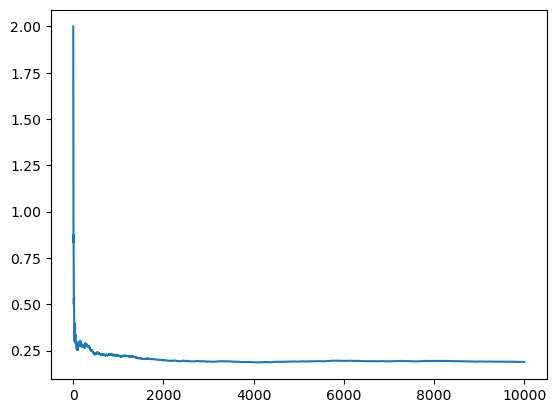

In [3]:
plt.plot(model.get_mse())

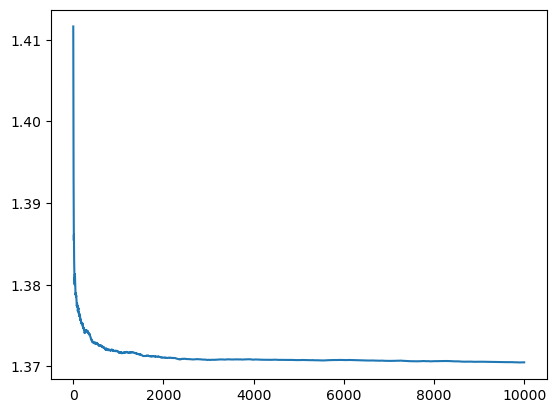

In [4]:
plt.plot(model.get_mnll())

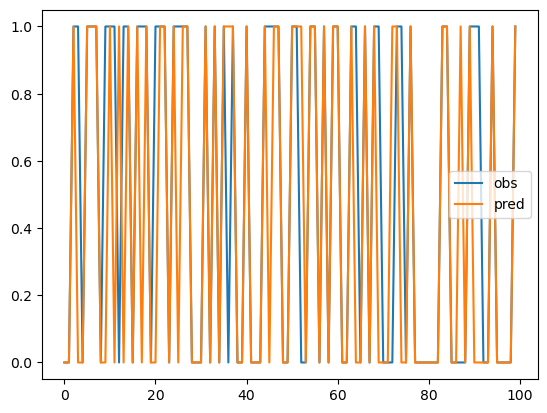

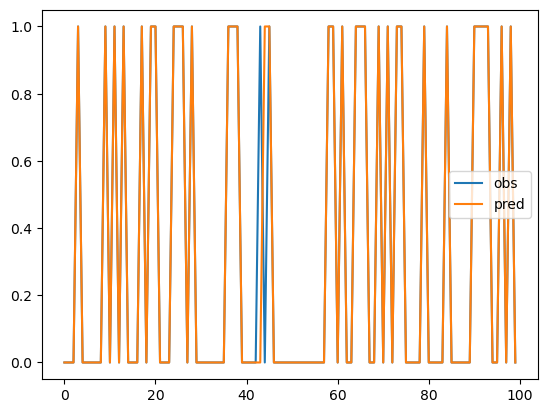

In [5]:
pred = model.get_predictions_binary()
obs = model.get_observations()

for d in range(2):
    start = -101
    end = start +100
    plt.plot(obs[start:end,d], label='obs')
    plt.plot(pred[start:end,d], label='pred')
    plt.legend()
    plt.show()

In [6]:
X_est = model.get_estimated_states()[0]
X_act = model.get_actual_states()[0]

In [7]:
model.get_estimated_states()

[array([[ 0.03660721, -0.02801602],
        [-0.04129499, -0.03208393],
        [-0.02180177,  0.01187717],
        ...,
        [-0.0287629 ,  0.00378111],
        [ 0.01851101, -0.01111365],
        [-0.03422979,  0.01010424]])]

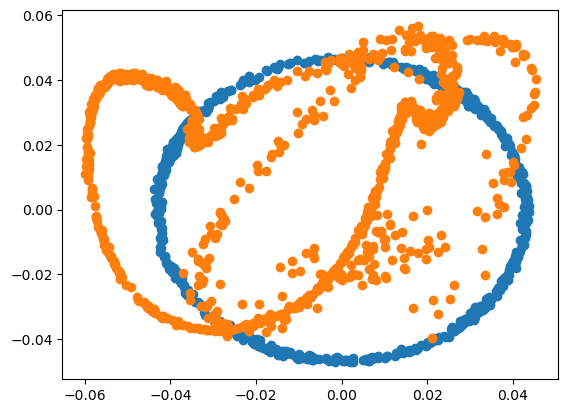

In [19]:
svd_dict = model.get_svd_representation(1000)
U = svd_dict["actual_svd_representation"][0]
U_est = svd_dict["estimated_svd_representation"][0]
plt.scatter(U[:, 0], U[:, 1], label='actual hidden states')
plt.scatter(U_est[:, 0], U_est[:, 1], label='estimated hidden states')
plt.show()

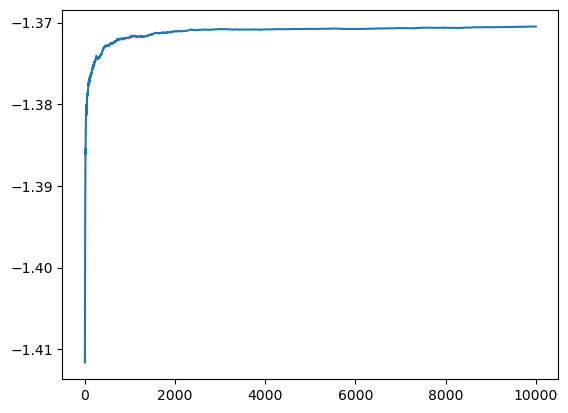

In [9]:
ll = model.get_log_likelihoods()
plt.plot(np.cumsum(ll) / np.arange(1, len(ll) + 1))

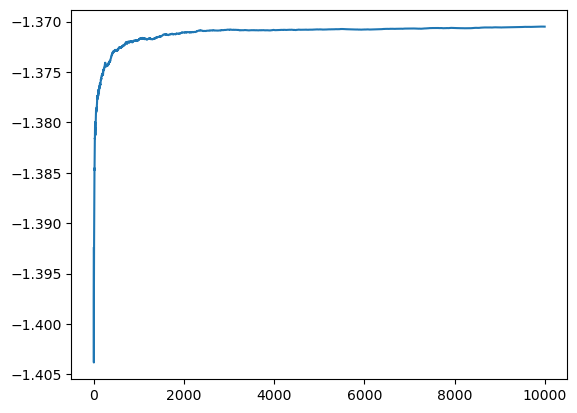

In [10]:
ll = model.get_log_likelihoods_forward()
plt.plot(np.cumsum(ll) / np.arange(1, len(ll) + 1))

In [17]:
# Prediction Accuracy
sum(pred - obs == 0) / len(obs)

array([0.8733, 0.938 ])